# **Introducao a Otimizacao**

**prof: Sergio Assuncao Monteiro, DSc**

linkedin: https://www.linkedin.com/in/sergio-assun%C3%A7%C3%A3o-monteiro-b781897b/

lattes: http://lattes.cnpq.br/9489191035734025

**Pacote:linprog**

**url:** https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html

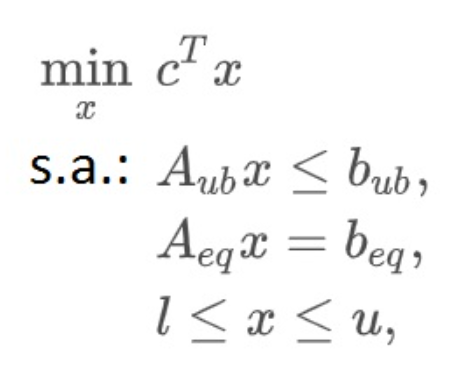

**Restrições de Igualdade**

In [19]:
import numpy as np
from scipy.optimize import linprog

In [20]:
def resolverPLIgualdade(c, A_eq, b_eq):
    res = linprog(c, A_eq=A_eq, b_eq=b_eq,
                  bounds=(0, None))
    return res
     

>minimize 70x_1 + 80x_2 +85x_3

>s.a.

>   x_1 + x_2 + x_3      = 100

>   x_1 + 4x_2 + 2x_3   = 235

>  3x_1 - x_2 + 4x_3   = 225

>   x >= 0 

In [21]:
def exemploI01():
    A_eq = np.array([[1,1,1],
                     [1,4,2],
                     [3,-1,4]])
    b_eq = np.array([100, 235, 225])
    c = np.array([70, 80, 85])
    return c, A_eq, b_eq

>minimize x_1 + 10x_2 -x_3

> s.a.

> x_1 + x_2 + x_3      = 100

> x_1 - 3x_2 + 2x_3   = 25

> x >= 0 

In [22]:
def exemploI02():
    A_eq = np.array([[1,1,1],
                     [1,-3,2]])
    b_eq = np.array([100, 25])
    c = np.array([1, 10, -1])
    return c, A_eq, b_eq

In [23]:
def carrega_instancia_igualdade(opcao):
  if(opcao==1):
    return exemploI01()
  else:
    return exemploI02()

In [24]:
id_instancia = 1;
[c, A_eq, b_eq]=carrega_instancia_igualdade(id_instancia);
resultado=resolverPLIgualdade(c, A_eq, b_eq); #resolver PL
print('Valor otimo:', resultado.fun)
print("Os valores de x sao:");
nelem=len(resultado.x)
for i in range(nelem):
    print("x[",i+1,"]=",resultado.x[i])

Valor otimo: 7974.999992201955
Os valores de x sao:
x[ 1 ]= 24.999999975818106
x[ 2 ]= 29.99999997078263
x[ 3 ]= 44.9999999556715


**Restrições de Desigualdade**

In [25]:
import numpy as np
from scipy.optimize import linprog
from numpy.linalg import solve

In [26]:
def resolverPLDesigualdade(c, A_ub, b_ub):
    res = linprog(c, A_ub=A_ub, b_ub=b_ub,bounds=(0, None))
    return res


>minimize 70x_1 + 80x_2 +85x_3

>s.a.

>   x_1 + x_2 + x_3      <= 100

>   x_1 + 4x_2 + 2x_3   >= 235

>   x >= 0 

In [27]:
def exemploD01():
    A_ub = np.array([[1,1,1],
                     [-1,-4,-2]])
    b_ub = np.array([100, -235])
    c = np.array([70, 80, 85])
    return c, A_ub, b_ub

>minimize x_1 + 10x_2 -x_3

>s.a.

>   x_1 + x_2 + x_3      >= 100

>   x_1 - 3x_2 + 2x_3   <= 25

>   x >= 0 

In [28]:
def exemploD02():
    A_ub = np.array([[-1,-1,-1],
                     [1,-3,2]])
    b_ub = np.array([-100, 25])
    c = np.array([1, 10, -1])
    return c, A_ub, b_ub
     

In [29]:
def carrega_instancia_desigualdade(opcao):
  if(opcao==1):
    return exemploD01()
  else:
    return exemploD02()

In [30]:
id_instancia = 1;
[c, A_ub, b_ub]=carrega_instancia_desigualdade(id_instancia);
resultado=resolverPLDesigualdade(c, A_ub, b_ub); #resolver PL
print('Valor otimo:', resultado.fun)
print("Os valores de x sao:");
nelem=len(resultado.x)
for i in range(nelem):
    print("x[",i+1,"]=",resultado.x[i])

Valor otimo: 4699.999956095525
Os valores de x sao:
x[ 1 ]= 1.9055400114332e-08
x[ 2 ]= 58.749999429226165
x[ 3 ]= 4.9829907111353385e-09


**Restrições de Igualdade e Desigualdade**

In [31]:
import numpy as np
from scipy.optimize import linprog
from numpy.linalg import solve

In [32]:
def resolverPL(c, A_eq, b_eq, A_ub, b_ub):
    res = linprog(c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub,
                  bounds=(0, None))
    return res

>minimize 70x_1 + 80x_2 +85x_3

>s.a.

>   x_1 + x_2 + x_3      <= 100
>   x_1 + 4x_2 + 2x_3   = 235
>   x >= 0 

In [33]:
def exemploT01():
    A_ub = np.array([[1,1,1]])
    b_ub = np.array([100])
    A_eq = np.array([[1,4,2]])
    b_eq = np.array([235])
    c = np.array([70, 80, 85])
    return c, A_eq, b_eq, A_ub, b_ub

>minimize x_1 + 10x_2 -x_3

>s.a.

>   x_1 + x_2 + x_3      = 100
>   x_1 - 3x_2 + 2x_3   <= 25
>   x >= 0 

In [34]:
def exemploT02():
    A_eq = np.array([[1,1,1]])
    b_eq = np.array([100])
    A_ub = np.array([[1,-3,2]])
    b_ub = np.array([25])
    c = np.array([1, 10, -1])
    return c, A_eq, b_eq, A_ub, b_ub

In [35]:
def carrega_instancia_igual_e_desigualdade(opcao):
  if(opcao==1):
    return exemploT01()
  else:
    return exemploT02()

In [36]:
id_instancia = 2;
[c, A_eq, b_eq, A_ub, b_ub]=carrega_instancia_igual_e_desigualdade(id_instancia);
resultado=resolverPL(c, A_eq, b_eq, A_ub, b_ub); #resolver PL
print('Valor otimo:', resultado.fun)
print("Os valores de x sao:");
nelem=len(resultado.x)
for i in range(nelem):
    print("x[",i+1,"]=",resultado.x[i])

Valor otimo: 268.7499985100499
Os valores de x sao:
x[ 1 ]= 81.24999948920153
x[ 2 ]= 18.749999903152588
x[ 3 ]= 1.0677482120974849e-08
